**루브릭 1. 데이터의 전처리 및 구성과정이 체계적으로 진행되었는가?**  
특수문자 제거, 토크나이저 생성, 패딩 처리의 작업들이 빠짐없이 진행되었는가?

-> 잘 진행되었습니다.

**루브릭 2. 가사 텍스트 생성 모델이 정상적으로 동작하는가?**  
텍스트 제너레이션 결과로 생성된 문장이 해석 가능한 문장인가?

-> 

**루브릭 3. 텍스트 생성모델이 안정적으로 학습되었는가?**  
텍스트 생성모델의 validation loss가 2.2 이하로 낮아졌는가?

-> 

**참고사항**

1. 목차(table of contents) 관련  

이전 exploration(05)에서는 jupyter notebook extension의 table of contents(2) 기능을 사용하여 전체 문서를 구조화했습니다.
이렇게 하면, 굳이 장번호와 절번호를 매번 명시하지 않아도, 장과 절의 순서가 잘 배열되는 동시에, 목차 또한 생성되어 좋습니다.
하지만, 이 기능은 로컬 환경의 jupyter notebook에서만 작용하고, (1) 깃허브에 올라갈 때에는 반영되지 않고, (2) AIFFEL jupyter 환경에서도 작동하지 않으며, (3) colab에서도, 단지 장과 절의 hierarchy만 명시될 뿐 번호가 자동적으로 생성되지 않습니다.

이에, 이번에는 문서를 다 작성한 후 목차(table of contents)를 직접(manual 하게) 상단에 적어보았습니다.
이렇게 하면, 로컬 환경의 jupyter notebook을 사용해 table of contents(2) 기능을 사용할 경우, 문서가 더 이상하게 보이리라는 단점이 있습니다.

향후에, AIFFEL jupyter 환경에서도 (table of contents(2) 기능을 포함한) nbextension을 사용할 수 있다면 참 좋을 것 같습니다.

2. 코드 및 주석 관련

기존 코드에서 이 문서로 코드를 옮길 때에 최대한 간결하게 쓰려고 했습니다.
따라서 기존 코드에 붙어있던 주석들은 최대한 제거했습니다.
또한, 이 문서에 직접적으로 필요하지 않은 코드들은 가급적 배제하였습니다.
다만, `dataset`이라고 이름 붙여졌던 객체에 대해서는, 이 문서의 전체적인 흐름과는 직접적으로 연관이 있지 않음에도 불구하고, 조금 분석을 해보았습니다.

또한, 각 장(1. 사전작업, 2. 모델 생성, 훈련 및 평가)의 맨 앞쪽에 주석들을 추가해, 코드에 대한 설명을 적어보았습니다.

***

## 목차

### 1. 사전작업
#### 1.1. 모듈 불러오기
#### 1.2. 데이터 불러오기
#### 1.3. 데이터 정제하기
#### 1.4. 데이터 분리하기
#### 1.5. `dataset`에 대한 이해
### 2. 모델 구성, 훈련 및 평가
#### 2.1. 모델 구성
#### 2.2. 모델 훈련 및 평가
#### 2.3. 문장 생성
### 3. 회고

***

# 1. 사전작업

파일트리

Github

├── aiffel_explorations

    ├── .git
    
    └── 06.ipynb

└── data

    └── exploration_06

        ├── .git

            ├── adele.txt

            ├── al-green.txt

            ː

            └── r-kelly.txt
        └── lyrics

 - `raw_corpus`
  - 원래 그대로 형태의 문장들을 불러왔습니다(`list`).
  - `txt_file_path`로 파일 경로를 불러왔습니다.
  - `raw_corpus`에 담긴 문장들은 총 187088개 입니다.
 - `corpus`
  - `raw_corpus`에 있는 문장들 중 일부 문장들을 제외하고 적당히 정제하여 담았습니다(`list`).
  - LMS에 제시되어있는 함수 `preprocess_sentence`를 그대로 가져와서 정제하는 데에 사용했습니다.
  - 제외한 문장들은 다음과 같습니다.
    - 아무 것도 없는 문장
    - 정제한 후, 문장에 포함된 단어의 개수가 15개 이상인 문장
  - `corpus`에 담긴 문장들은 총 156227개 입니다.
 - `tensor`
  - `corpus`의 각 문장들을 토큰화했습니다. (`np.array`)
  - LMS에 제시되어있는 함수 `tokenizer`를 그대로 가져오되,`num_words`를 7000에서 1200으로 변경했습니다.
  - `padding`은 원래 주어졌던 대로 'post'로 설정했습니다.
  'pre'로 바꿔보았는데, 성능이 떨어졌습니다.
 - `src_input`, `tgt_input`
  - 각 문장의 맨 뒷단어를 잘라내어 `src_input`을 만들고, 각 문장의 맨 앞단어를 잘라내어 `tgt_input`을 만들었습니다.
 - `enc_train`, `enc_val`, `dec_train`, `dec_val`
  - 데이터를 trainset과 testset, input과 label로 나누었습니다.
 - `dataset`
  - 이 부분은 이번 exploration의 흐름과는 관련이 없는 부분이지만, `dataset`이라는 객체에 대한 궁금증에 여러 실험을 해본 것입니다.
  - LMS 노드에 적힌 대로 `dataset`을 정의한 후, 이것의 구조를 들여다보았습니다.
  `dataset`은 `tf.data.Dataset`와 같은 데이터타입을 가지고 있습니다.
  따라서 구조를 들여다보기 어려우나, iterator의 역할을 하는 것 같아 list comprehension을 통해 `list`형식으로 만들고, 형태를 보기 위해 `np.array`로 바꾸었습니다.
  - 그 후, shape을 출력해보니, (배치작업을 하기 전에는) (156227, 2, 14)로 나옵니다.
  156227은 문장의 개수를, 2는 `src`/`tgt`을 의미하며, 14는 각 문장의 단어의 개수를 의미합니다.
  가공한 후의 shape은 (배치작업 후에는) (610, 2, 256, 14)로 바뀝니다.
  여기서 610은 한 epoch당 optimizer가 동작하는 횟수을 의미하고, 256은 배치 사이즈를 말합니다.

## 1.1. 모듈 불러오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os, re, glob
import tensorflow as tf
from sklearn.model_selection import train_test_split

## 1.2. 데이터 불러오기

In [2]:
txt_file_path = '../data/exploration_06/lyrics/*'
txt_list = glob.glob(txt_file_path)

In [3]:
print(len(txt_list))
print(np.array(txt_list[:3]))

49
['../data/exploration_06/lyrics/lin-manuel-miranda.txt'
 '../data/exploration_06/lyrics/bob-marley.txt'
 '../data/exploration_06/lyrics/lil-wayne.txt']


In [4]:
raw_corpus = []
for txt_file in txt_list:
    with open(txt_file, "r") as f:
        raw = f.read().splitlines()
        raw_corpus.extend(raw)
print(type(raw_corpus))
print(len(raw_corpus))
print(np.array(raw_corpus[:3]))

<class 'list'>
187088
['How does a bastard, orphan, son of a whore'
 'And a Scotsman, dropped in the middle of a forgotten spot in the Caribbean by providence impoverished,'
 'In squalor, grow up to be a hero and a scholar? The ten-dollar founding father without a father']


## 1.3. 데이터 정제하기

In [5]:
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip() # 1
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence) # 2
    sentence = re.sub(r'[" "]+', " ", sentence) # 3
    sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence) # 4
    sentence = sentence.strip() # 5
    sentence = '<start> ' + sentence + ' <end>' # 6
    return sentence

In [6]:
corpus = []
for sentence in raw_corpus:
    if len(sentence) == 0: continue
#    if sentence[-1] == ":": continue
    preprocessed_sentence = preprocess_sentence(sentence)
    if len(preprocessed_sentence.split(" ")) > 15: continue
    corpus.append(preprocessed_sentence)

In [7]:
print(type(corpus))
print(len(corpus))

<class 'list'>
156227


## 1.4. 데이터 분리하기

In [8]:
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        num_words=12000, filters=' ',oov_token="<unk>")
    tokenizer.fit_on_texts(corpus)
    tensor = tokenizer.texts_to_sequences(corpus)
    tensor = tf.keras.preprocessing.sequence.pad_sequences(
        tensor, padding='post')
    print(tensor,tokenizer)
    return tensor, tokenizer
tensor, tokenizer = tokenize(corpus)
print(type(tensor))

[[  2  79 622 ...   3   0   0]
 [  2  37   9 ...   0   0   0]
 [  2 115 573 ...   0   0   0]
 ...
 [  2   4 117 ...   0   0   0]
 [  2 258 192 ...  12   3   0]
 [  2   7  34 ...   0   0   0]] <keras_preprocessing.text.Tokenizer object at 0x7f041f83f8e0>
<class 'numpy.ndarray'>


In [9]:
src_input = tensor[:, :-1]
tgt_input = tensor[:, 1:]
print(src_input[0])
print(tgt_input[0])

[    2    79   622     9  4490     5 10334     5   646    20     9  3400
     3     0]
[   79   622     9  4490     5 10334     5   646    20     9  3400     3
     0     0]


In [10]:
enc_train, enc_val, dec_train, dec_val = train_test_split(src_input,tgt_input, test_size=0.2, random_state=15)

## 1.5. `dataset`에 대한 이해

In [11]:
BUFFER_SIZE = len(enc_train)
print('BUFFER_SIZE :',BUFFER_SIZE)
BATCH_SIZE = 256
print('BATCH_SIZE :',BATCH_SIZE)
steps_per_epoch = len(src_input) // BATCH_SIZE
print('steps_per_epoch :',steps_per_epoch)
VOCAB_SIZE = tokenizer.num_words + 1
print('VOCAB_SIZE :',VOCAB_SIZE)

BUFFER_SIZE : 124981
BATCH_SIZE : 256
steps_per_epoch : 610
VOCAB_SIZE : 12001


In [12]:
dataset = tf.data.Dataset.from_tensor_slices((src_input, tgt_input))
dataset_as_np_array = np.array([data for data in dataset])
print(dataset_as_np_array.shape)
dataset = dataset.shuffle(BUFFER_SIZE)
dataset_as_np_array = np.array([data for data in dataset])
print(dataset_as_np_array.shape)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
dataset_as_np_array = np.array([data for data in dataset])
print(dataset_as_np_array.shape)
print(dataset)

(156227, 2, 14)
(156227, 2, 14)
(610, 2, 256, 14)
<BatchDataset shapes: ((256, 14), (256, 14)), types: (tf.int32, tf.int32)>


# 2. 모델 구성, 훈련 및 평가

 - `TextGenerator`
  - 모델을 구성하기 전, `TextGenerator` 클래스를 정의했습니다.
  이 정의는 LMS에 정의된 코드를 그대로 따랐습니다.
  - 이 클래스는, embedding layer 한 개와 LSTM 레이어 두 개, 그리고 fully connected layer 한 개로 구성되어 있습니다.
  - LSTM을 두 개 쌓고 있으며, 그 이후에는 FC layer가 나오므로, `return_sequences`는 둘 다 `True`로 놓습니다.
 - `model`
  - `TextGenerator`를 사용하여 모델을 만듭니다.
  - `embedding_size`는 512로 둡니다.
  이것은 word vector의 차원을 말합니다.
  - `hidden_size`는 2048로 둡니다.
  이것은 LSTM의 hidden state vector의 차원을 말합니다.
  - 이 두 값은 원래, 각각 256, 1024로 되어 있었지만, 원하는 만큼의 성능이 나오지 않아 둘 다 두 배로 늘린 것입니다.
 - `prd_sample`
  - LMS에서 한 대로, `dataset`의 `take` 메서드를 이용하여 하나의 sample을 가지고 `model`에 입력함으로써 `model.build()`를 호출합니다.
  - 그 입력에 대한 결과는 `prd_sample`로 임의로 저장해보았습니다.
  - `prd_sample`을 `np.array`로 바꾸어 shape을 계산해보면, (256, 14, 12001)이 나옵니다.

## 2.1. 모델 구성

In [13]:
class TextGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size) 
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)  
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.linear = tf.keras.layers.Dense(vocab_size)
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.rnn_2(out)
        out = self.linear(out)
        return out

In [14]:
embedding_size = 512
hidden_size = 2048

In [15]:
model = TextGenerator(tokenizer.num_words + 1, embedding_size , hidden_size) 

In [22]:
for src_sample, tgt_sample in dataset.take(1): break
prd_sample = model(src_sample)
print(type(prd_sample))
print(np.array(prd_sample).shape)
#print(prd_sample)

<class 'tensorflow.python.framework.ops.EagerTensor'>
(256, 14, 12001)
tf.Tensor(
[[[ -1.9320884    3.2616475  -11.665983   ... -10.587843    -4.488203
   -11.506547  ]
  [ -3.6160734    6.0042796  -10.070853   ... -12.129986    -5.2112975
    -9.952361  ]
  [ -0.799966     4.1585784  -10.226746   ... -13.970858    -5.5524487
    -9.786928  ]
  ...
  [ 22.7103       1.7247651  -17.066486   ... -15.405719    -3.7969322
   -16.28437   ]
  [ 22.964546     1.9736316  -17.711548   ... -16.121782    -3.658985
   -16.804665  ]
  [ 22.947813     1.9464073  -17.752821   ... -16.154425    -3.9642456
   -16.871372  ]]

 [[ -1.9320884    3.2616475  -11.665983   ... -10.587843    -4.488203
   -11.506547  ]
  [ -6.5648565    3.4500663  -12.208611   ... -10.36776     -9.0723915
   -12.331044  ]
  [ -0.5239807    5.122368    -9.667109   ... -12.689533    -4.5545144
    -9.513761  ]
  ...
  [ 22.538195     0.33301508 -17.03061    ... -15.21655     -4.0208035
   -16.132662  ]
  [ 22.337763     0.4732745

In [17]:
model.summary()

Model: "text_generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  6144512   
_________________________________________________________________
lstm (LSTM)                  multiple                  20979712  
_________________________________________________________________
lstm_1 (LSTM)                multiple                  33562624  
_________________________________________________________________
dense (Dense)                multiple                  24590049  
Total params: 85,276,897
Trainable params: 85,276,897
Non-trainable params: 0
_________________________________________________________________


In [18]:
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
model.compile(loss=loss, optimizer=optimizer)

## 2.2. 모델 훈련 및 평가

In [19]:
hist = model.fit(enc_train, dec_train,batch_size=256,
                 validation_data = (enc_val,dec_val), epochs=10)

Epoch 1/10
489/489 [==============================] - 261s 530ms/step - loss: 3.3111 - val_loss: 2.9605
Epoch 2/10
489/489 [==============================] - 259s 530ms/step - loss: 2.7807 - val_loss: 2.7061
Epoch 3/10
489/489 [==============================] - 260s 531ms/step - loss: 2.4931 - val_loss: 2.5330
Epoch 4/10
489/489 [==============================] - 260s 531ms/step - loss: 2.2204 - val_loss: 2.4068
Epoch 5/10
489/489 [==============================] - 260s 532ms/step - loss: 1.9604 - val_loss: 2.3050
Epoch 6/10
489/489 [==============================] - 260s 531ms/step - loss: 1.7186 - val_loss: 2.2338
Epoch 7/10
489/489 [==============================] - 260s 533ms/step - loss: 1.5049 - val_loss: 2.1827
Epoch 8/10
489/489 [==============================] - 260s 533ms/step - loss: 1.3262 - val_loss: 2.1582
Epoch 9/10
489/489 [==============================] - 261s 533ms/step - loss: 1.1862 - val_loss: 2.1550
Epoch 10/10
489/489 [==============================] - 260s 533m

KeyError: 'accuracy'

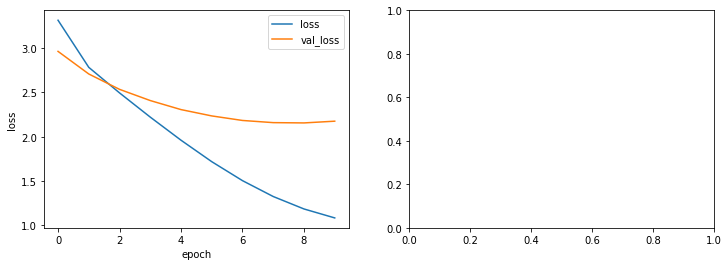

In [20]:
plt.rcParams["figure.figsize"] = (12,4)
plt.subplot(121)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','val_loss'])

plt.subplot(122)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['accuracy','val_accuracy'])

## 2.3. 문장 생성

In [ ]:
def generate_text(model, tokenizer, init_sentence="<start>", max_len=15):
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)
    end_token = tokenizer.word_index["<end>"]
    while True:
        predict = model(test_tensor) 
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1] 
        test_tensor = tf.concat([test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1)
        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break
    generated = ""
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "
    return generated

In [ ]:
generate_text(model, tokenizer, init_sentence="<start> i love", max_len=20)

# 3. 회고